# 🍿 Netflix 데이터 분석

> 데이터를 파악하고, 전처리를 수행 한 후 분석을 통해 여러가지 인사이트를 도출

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/[데이터분석 프로젝트]/Netflix

/content/drive/MyDrive/[데이터분석 프로젝트]/Netflix


### 0. 라이브러리 가져오기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. 데이터 확인

[✔️ Kaggle 데이터셋 다운로드 바로가기](https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download&select=netflix_titles.csv)

**`Netflix Movies and TV Shows`**: Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.



In [4]:
netflix = pd.read_csv("netflix_titles.csv")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

| 컬럼 이름     | 설명 |
|---------------|------|
| `show_id`     | 각 쇼의 고유 ID |
| `type`      | 쇼의 카테고리로 영화 또는 TV 쇼 |
| `title`      | 쇼의 이름 |
| `director`          | 쇼의 감독 이름 |
| `cast`        | 배우의 이름 및 쇼의 다른 출연진 |
| `country`     | Netflix에서 프로그램을 시청할 수 있는 국가의 이름 |
| `date_added`     | Netflix에 프로그램이 추가된 날짜 |
| `release_year`  | 쇼의 출시 연도 |
| `rating`  | Netflix 등급 표시 |
| `duration`        | 쇼의 지속 시간 |
| `listed_in`       | 쇼의 장르 |
| `description`         | 쇼를 설명하는 일부 텍스트 |

In [6]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
# 결측치 비율 확인

print("<컬럼 별 NULL값 비율 확인>")

for i in netflix.columns:
  missingValueRate = netflix[i].isna().sum() / len(netflix) * 100
  if (missingValueRate > 0):
    print("{:<12s}: {:.2f}%".format(i, missingValueRate))

<컬럼 별 NULL값 비율 확인>
director    : 29.91%
cast        : 9.37%
country     : 9.44%
date_added  : 0.11%
rating      : 0.05%
duration    : 0.03%


> director, cast, country는 **결측치를 대체**하고,  
date_added, rating, duration는 **해당 행을 삭제**하기로 결정

In [8]:
# country(9.44%) 결측치 처리

netflix['country'] = netflix['country'].fillna("No Data")

In [9]:
# director(29.91%), cast(9.37%) 결측치 처리

netflix['director'] = netflix['director'].replace(np.nan, 'No Data')
netflix['cast'] = netflix['cast'].replace(np.nan, 'No Data')

In [10]:
# 결측치가 있는 행 전체 제거
# date_added(0.11%), rating(0.05%), duration(0.03%)

netflix.dropna(axis=0, inplace=True)

In [11]:
netflix.shape

(8790, 12)

In [12]:
# 결측치 확인 -> 정상적으로 수행

netflix.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


### 2. 피처 엔지니어링

> **Feature Engineering**이란?  
기존에 존재하는 변수를 활용하여 새로운 정보를 추가로 생성하는 과정

따라서, rating 변수를 이용하여 Netflix 시청 등급(age_group) 정보 변수를 생성해보려고 한다.

[✔️ 넷플릭스 시청 등급 설명표](https://www.primevideo.com/help/ref=atv_hp_nd_cnt?nodeId=GFGQU3WYEG6FSJFJ)

1) rating 컬럼의 값을 age_group이라는 새로운 컬럼으로 복사한다.  
2) 시청 등급 기준표를 참고하여 Netflix의 rating 변수를 이용한 age_group_dic 변수를 생성한다.  
3) 시청 등급 코드를 더 이해하기 쉬운 표현으로 매핑할 딕셔너리를 정의한다.

In [13]:
netflix['rating']

,rating
0,PG-13
1,TV-MA
2,TV-MA
3,TV-MA
4,TV-MA
...,...
8802,R
8803,TV-Y7
8804,R
8805,PG


In [14]:
netflix['age_group'] = netflix['rating']

age_group_dic = {
    'G': 'All',
    'TV-G': 'All',
    'TV-Y': 'All',
    'PG': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-Y7-FV': 'Older Kids',
    'TV-PG': 'Older Kids',
    'PG-13': 'Teens',
    'TV-14': 'Young Adults',
    'NC-17': 'Adults',
    'NR': 'Adults',
    'UR': 'Adults',
    'R': 'Adults',
    'TV-MA': 'Adults'
    }

In [15]:
# map 함수를 이용하여 rating 컬럼의 값을 딕셔너리를 기반으로 변환하여 age_group 컬럼에 저장

netflix['age_group'] = netflix['age_group'].map(age_group_dic)
netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults


### 3. 넷플릭스 시각화

> **Netflix 대표 색상**

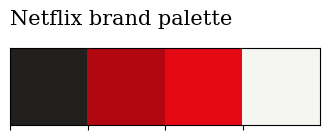

In [16]:
sns.palplot(['#221f1f', '#b20710', '#e50914', '#f5f5f1'])

plt.title('Netflix brand palette', loc='left', fontfamily='serif', fontsize=15, y=1.2)
plt.show()

> **Netflix type 파이 차트**

In [17]:
type_counts = netflix['type'].value_counts()
print(type_counts)

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


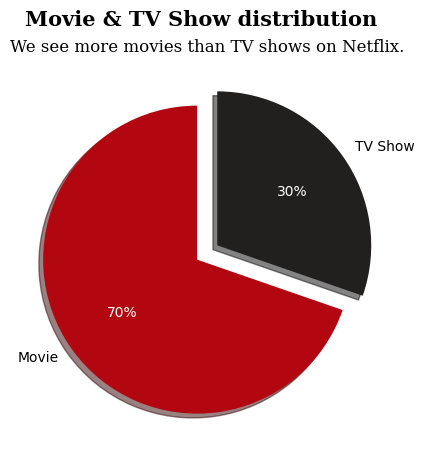

In [18]:
fig = plt.figure(figsize=(5, 5))

wedges, texts, autotexts = plt.pie(type_counts, labels=type_counts.index, autopct='%0.f%%', startangle=90,
        explode=[0.08, 0.08], shadow=True, colors=['#b20710', '#221f1f'])

for autotext in autotexts:
    autotext.set_color('white')

plt.suptitle('Movie & TV Show distribution', fontfamily='serif', fontsize=15, fontweight='bold')
plt.title('We see more movies than TV shows on Netflix.', fontfamily='serif', fontsize=12)

plt.show()

- 넷플릭스에는 영화 카테고리가 더 많은 것들 알 수 있다.

> **Netflix 워드 클라우드 시각화**  
데이터의 description 열 이용한 워드 클라우드 생성

1) wordcolud에서 작동할 수 있도록 데이터프레임을 list로 1차 변환시키고 문자열로 2차 변환  
2) mask -> 단어를 그릴 위치 설정, 흰색 항목은 마스킹된 것으로 간주하고, 로고 이미지 열고 넘파이 배열로 변환  
3) 워드 클라우드 색상맵을 만들고 생성

In [19]:
from wordcloud import WordCloud
from PIL import Image

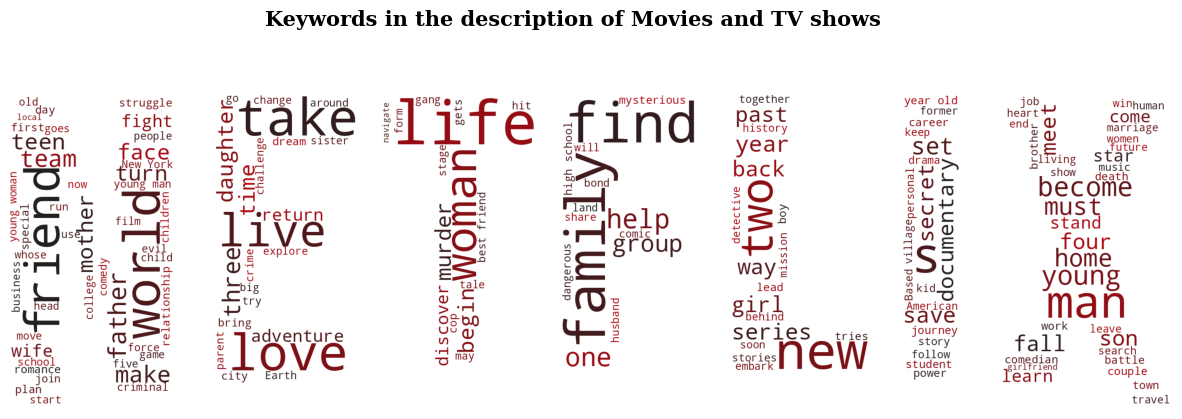

In [21]:
plt.figure(figsize=(15, 5))

text = str(list(netflix['description']))
mask = np.array(Image.open('/content/netflix_logo.jpg'))

cmap = plt.matplotlib.colors.LinearSegmentedColormap.from_list('', ['#221f1f','#b20710'])

wordcloud = WordCloud(background_color = 'white', width = 1400, height = 1400,
                      max_words = 170, mask = mask, colormap=cmap).generate(text)

plt.suptitle('Keywords in the description of Movies and TV shows',
             fontweight='bold', fontfamily='serif', fontsize=15)

plt.imshow(wordcloud)

plt.axis('off')
plt.show()

> **연도별 콘텐츠 출시 추이 막대 그래프**  
2000년도 이상만 카운팅하여 표현함

In [26]:
sns.set(style="whitegrid")

filter = netflix[netflix['release_year'] >= 2000]
year_counts = filter['release_year'].value_counts().sort_index()

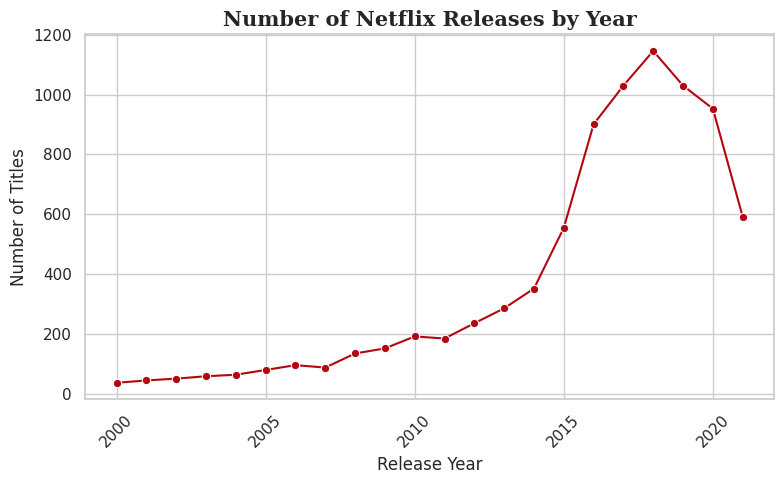

In [31]:
plt.figure(figsize=(8, 5))

sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='#b20710')

plt.title('Number of Netflix Releases by Year', fontweight='bold', fontfamily='serif', fontsize=15)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

> **작품 수가 많은 감독 순서를 나타내는 막대 그래프**

In [34]:
directors = netflix[netflix['director'].notna() & (netflix['director'] != 'No Data')]['director']

# 감독이 여러명인 경우, 각각 집계
top_directors = directors.str.split(', ').explode().value_counts().head(10)

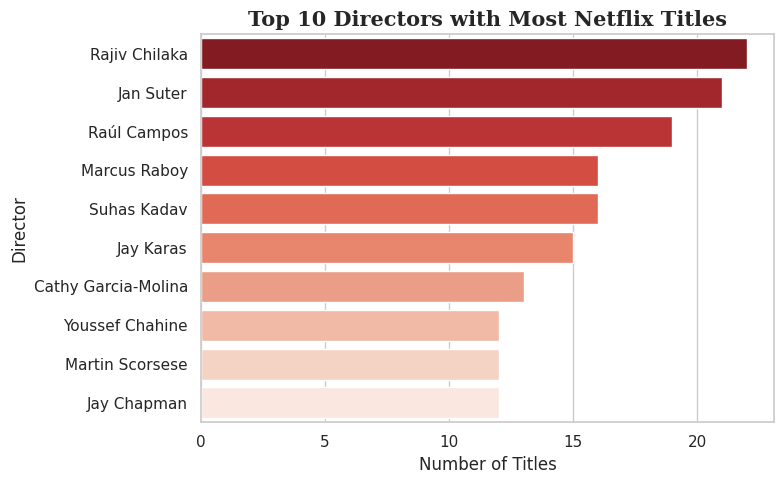

In [39]:
plt.figure(figsize=(8, 5))

sns.barplot(y=top_directors.index, x=top_directors.values, hue=top_directors.index,
            palette='Reds_r', dodge=False, legend=False)

plt.title('Top 10 Directors with Most Netflix Titles', fontweight='bold', fontfamily='serif', fontsize=15)
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.tight_layout()

plt.show()